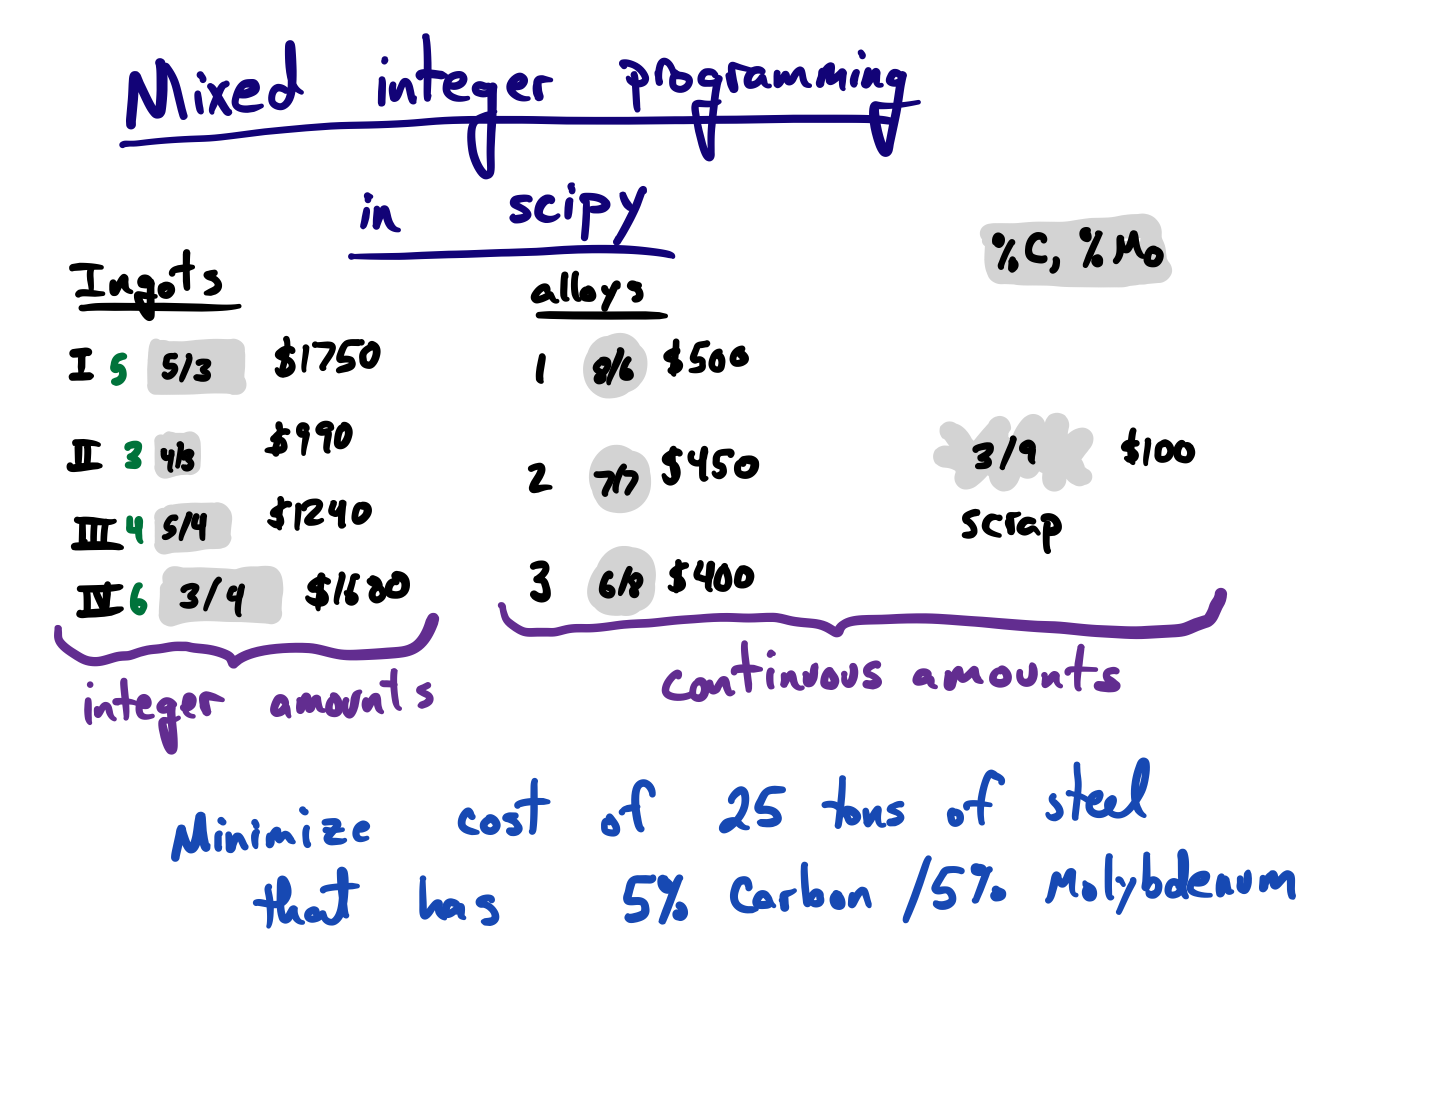

# Feedstocks

| Ingot | weight | %carbon | %Molybdenum | Cost/ton |
|-------|--------|---------|-------------|----------|
|     1 |      5 |       5 |           3 | \$350     |
|     2 |      3 |       4 |           3 | \$330     |
|     3 |      4 |       5 |           4 | \$310     |
|     4 |      6 |       3 |           4 | \$280     |


| alloy | %carbon | %molybdenum | cost/ton |
|-------|---------|-------------|-----------|
|     1 |       8 |           6 | \$500      |
|     2 |       7 |           7 | \$450      |
|     3 |       6 |           8 | \$400      |
| scrap |       3 |           9 | \$100      |


In [3]:
import numpy as np
from scipy.optimize import milp, LinearConstraint, Bounds

In [4]:
c = np.array([5 * 350, # ingot 1
              3 * 330, # ingot 2
              4 * 310, # ingot 3
              6 * 280, # ingot 4
              500,     # alloy 1
              450,     # alloy 2
              400,     # alloy 3
              100])    # scrap

integrality = ([1, 1, 1, 1,  # integers
                0, 0, 0, 0]) # continuous

In [5]:
# total weight
A0 = [5, 3, 4, 6, 1, 1, 1, 1]
lb0 = lu0 = 25

# A0 @ x = 25

# constraint on carbon
A1 = [0.05 * 5, 0.04 * 3, 0.05 * 4, 0.03 * 6,
      0.08, 0.07, 0.06, 0.03]
lb1 = lu1 = 0.05 * 25

# constraint on molybdenum
A2 = [0.03 * 5, 0.03 * 3, 0.04 * 4, 0.04 * 6,
      0.06, 0.07, 0.08, 0.09]
lb2 = lu2 = 0.05 * 25

# Put them all together
A = np.array([A0, A1, A2])
lb = np.array([lb0, lb1, lb2])
lu = np.array([lu0, lu1, lu2])

In [7]:
milp(c, integrality=integrality,
     bounds=Bounds(0, [1, 1, 1, 1, np.inf, np.inf, np.inf, np.inf]),
     constraints=LinearConstraint(A, lb, lu))

            fun: 8495.0
        message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
 mip_dual_bound: 8495.0
        mip_gap: 0.0
 mip_node_count: 1
         status: 0
        success: True
              x: array([1.  , 1.  , 0.  , 1.  , 7.25, 0.  , 0.25, 3.5 ])